In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as sc

### Data importation and pre-processing

In [2]:
df = pd.read_csv('taxi+service+trajectory+prediction+challenge+ecml+pkdd+2015/train.csv')
df.dropna()
trips = df[['TRIP_ID', 'POLYLINE']]

### Useful functions

In [8]:
def extract_traj(df): 
    n = np.shape(df)[0]
    list_trips = []
    for i in df['POLYLINE']: 
        list_trips.append(np.array(eval(i)))
    return list_trips

def plot_trajectories_list(ls): 
    for i in range(len(ls)): 
        plt.plot(ls[i][:,0], ls[i][:,1])
    plt.show()
    pass

def interpolation(ls, num_points):
    """
    Linear interpolation of the given data points.
    
    Parameters:
        x (list): List of x-coordinates.
        y (list): List of y-coordinates.
        num_points (int): Number of points for interpolation.
        
    Returns:
        tuple: Tuple containing the interpolated x and y coordinates.
    """
    newls = []
    for i in range(len(ls)): 
        x = ls[i][:,0]
        y = ls[i][:,1]

        ### OPTION 1
        # Create new x values for interpolation
        #interpolated_x = np.linspace(min(x), max(x), num_points)
        
        # Interpolate y values
        #interpolated_y = np.interp(interpolated_x, x, y)

        ### OPTION 2
        # Create an interpolation function for x and y separately
        f_x = sc.interp1d(np.linspace(0, 1, len(x)), x, kind='linear')
        f_y = sc.interp1d(np.linspace(0, 1, len(y)), y, kind='linear')
        
        # Interpolate y values
        t = np.linspace(0, 1, 50)
        interpolated_x = f_x(t)
        interpolated_y = f_y(t)

        new_item = np.array([interpolated_x, interpolated_y]).T
        newls.append(new_item)
    return newls


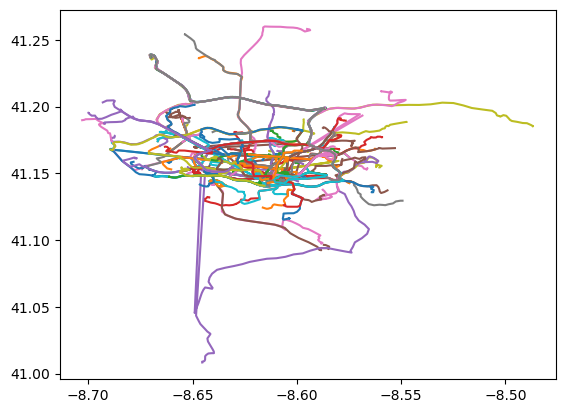

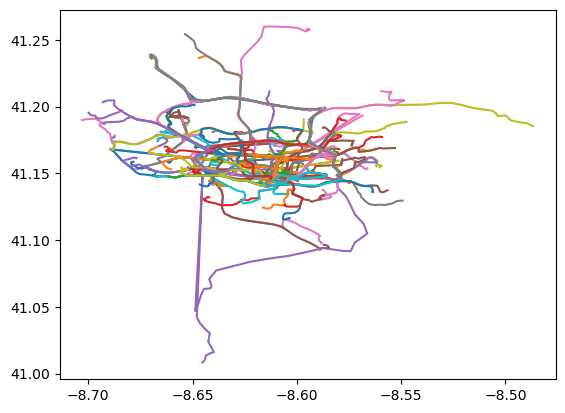

In [9]:
ls = extract_traj(trips.iloc[0:200])
mask = [len(i)>2 for i in ls]
selected_elements = [x for i, x in enumerate(ls) if mask[i]]

plot_trajectories_list(selected_elements)

#perform interpolation
n_points=50
newls = interpolation(selected_elements, n_points)
plot_trajectories_list(newls)